# Exploration des bases de données et premières statistiques descriptives

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## 1. Données France

## 1.1. Données trafic aérien

In [2]:
# On commence par visualiser la table
df_air_traffic_france = pd.read_csv('france_air_traffic_210712.csv')
df_air_traffic_france.head(5)

,country_origin,citydest,sheduled_time_start,seats,number_planes
0,Albania,Nantes,2021-10-12,189.0,1
1,Albania,Paris,2017-08-17,189.0,1
2,Albania,Paris,2017-08-19,189.0,1
3,Albania,Paris,2017-08-22,189.0,1
4,Albania,Paris,2020-08-12,148.0,1


On cherche à déterminer le nombre de vols et le nombre de sièges vers les différentes destinations françaises.

In [14]:
# On fait la somme du nombre de sièges et de vols par destination 
df_air_traffic_france2=df_air_traffic_france.groupby('citydest').sum().sort_values('number_planes', ascending = True)
df_air_traffic_france2=df_air_traffic_france2.reset_index()

In [15]:
# Total de sièges et de vols vers la France
df_air_traffic_france3=df_air_traffic_france2.sum()
df_air_traffic_france3

citydest         Toussus-Le-NobleAuxerreOrleansAurillacCalaisCr...
seats                                                  1.53327e+08
number_planes                                               882879
dtype: object

Au total, il y a 882 879 vols qui arrivent sur le sol français.

Text(0, 0.5, 'Destination')

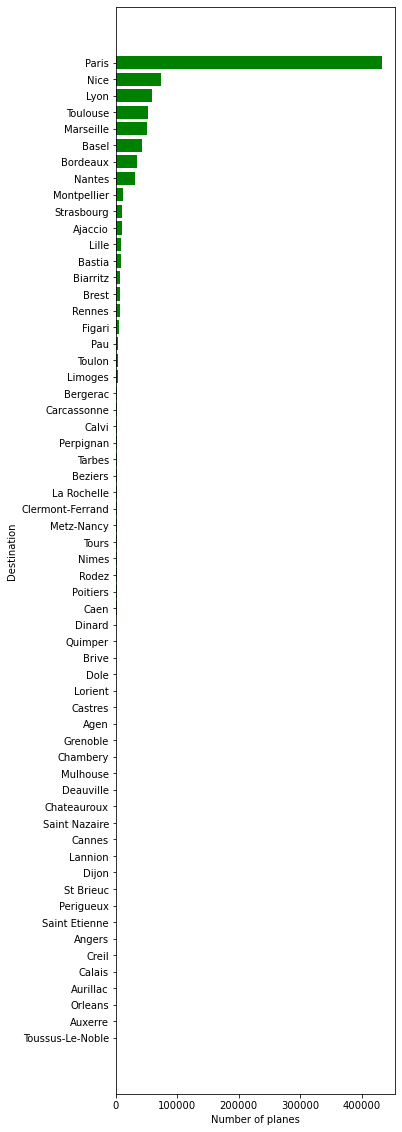

In [16]:
# On visualise le nombre de vols qui arrivent dans les différents aéroports français.
fig = plt.figure(1, figsize=(5, 20))
plt.barh( df_air_traffic_france2["citydest"], df_air_traffic_france2['number_planes'], color="green")
plt.xlabel('Number of planes')
plt.ylabel('Destination')

La très grande majorité des vols arrive sur le sol français à Paris (49% des vols). Viennent ensuite d'autres métropoles comme Nice (8,4%) Lyon (6,6%), Toulouse (5,9%), Marseille (5,7%), Basel (4,9%) ou Bordeaux (3,9%).

In [7]:
# A peu près pareil pour le nombre de sièges 
# fig = plt.figure(1, figsize=(3, 20))
# plt.barh( df_air_traffic_france2["citydest"], df_air_traffic_france2['seats'], color="green")
# plt.xlabel('Number of seats')
# plt.ylabel('Destination')

On cherche à étudier le trafic aérien.

Text(0, 0.5, 'Number of planes')

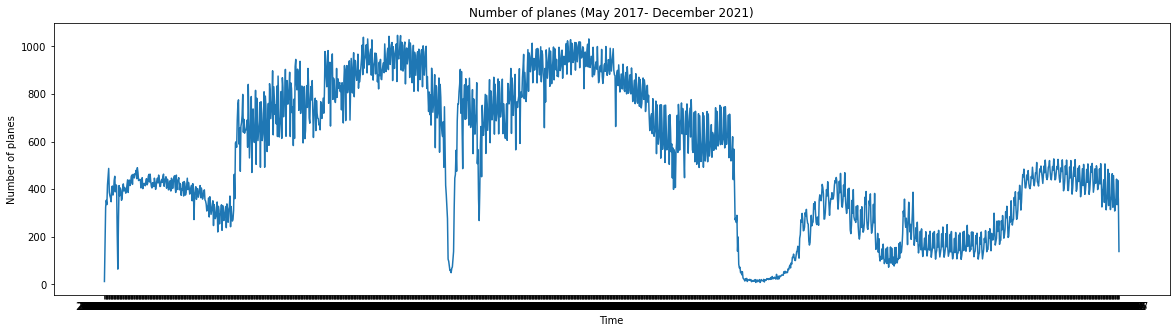

In [10]:
df_air_traffic_france4=df_air_traffic_france.groupby('sheduled_time_start').sum()
df_air_traffic_france4=df_air_traffic_france4.reset_index()
x=df_air_traffic_france4["sheduled_time_start"]
y=df_air_traffic_france4["number_planes"]
fig = plt.figure(1, figsize=(20, 5))
plt.plot(x, y)
plt.title('Number of planes (May 2017- December 2021)')
plt.xlabel('Time')
plt.ylabel('Number of planes')

Text(0, 0.5, 'Number of seats')

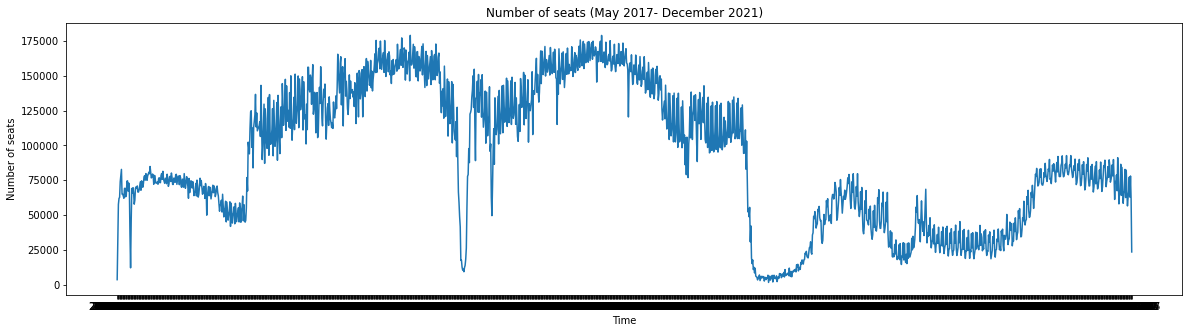

In [9]:
df_air_traffic_france4=df_air_traffic_france.groupby('sheduled_time_start').sum()
df_air_traffic_france4=df_air_traffic_france4.reset_index()
x=df_air_traffic_france4["sheduled_time_start"]
y=df_air_traffic_france4["seats"]
fig = plt.figure(1, figsize=(20, 5))
plt.plot(x, y)
plt.title('Number of seats (May 2017- December 2021)')
plt.xlabel('Time')
plt.ylabel('Number of seats')

On observe une très forte diminution des vols et du nombre de sièges avec l'arrivée de la crise sanitaire, début 2020. Le niveau d'avant covid n'a jamais été rattrapé.

On cherche à étudier la provenance des touristes qui arrivent en France.

In [17]:
df_air_traffic_france5=df_air_traffic_france.groupby('country_origin').sum().sort_values('number_planes', ascending = True)
df_air_traffic_france5=df_air_traffic_france5.reset_index()

Text(0, 0.5, 'Provenance')

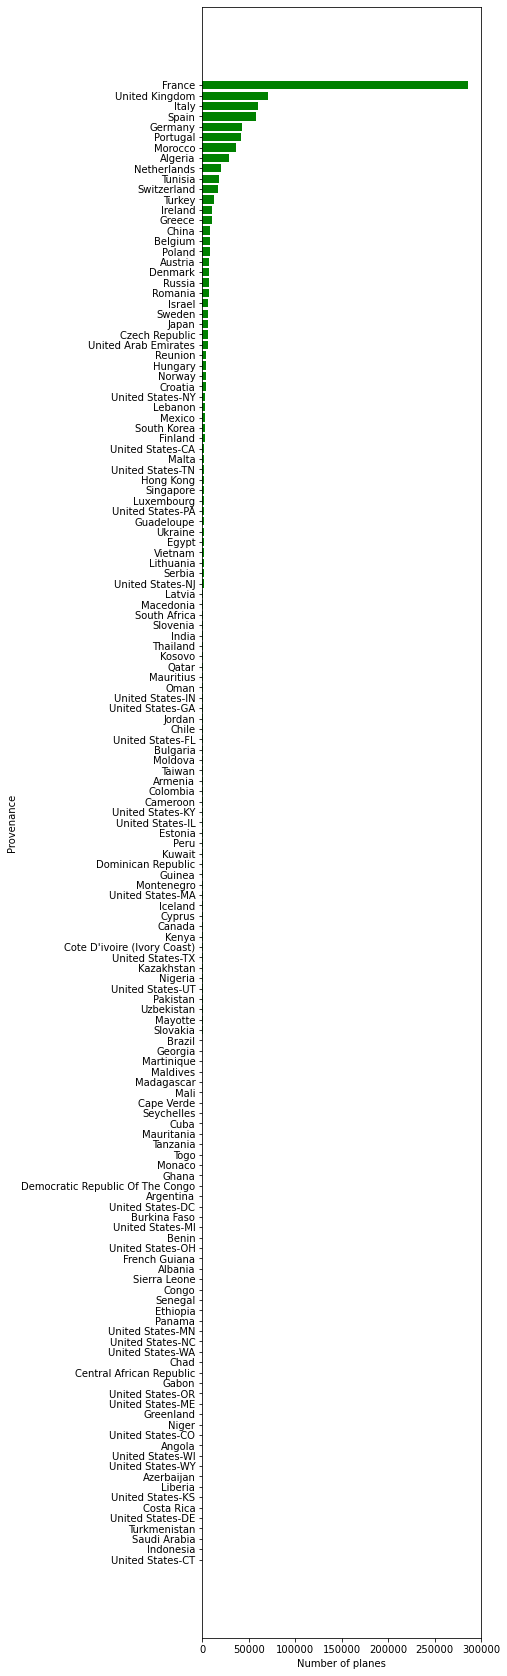

In [18]:
fig = plt.figure(1, figsize=(5, 30))
plt.barh( df_air_traffic_france5["country_origin"], df_air_traffic_france5['number_planes'], color="green")
plt.xlabel('Number of planes')
plt.ylabel('Provenance')

In [17]:
# importation de la table "world" de geopandas pour classer les pays par continent 
# df_world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world=pd.read_csv("world.csv")
world.rename(columns={'name': 'country_origin'}, inplace=True)
df_air_traffic_france5=df_air_traffic_france5.merge(world, on='country_origin', how='left')
df_air_traffic_france5=df_air_traffic_france5.groupby('continent').sum()
df_air_traffic_france5=df_air_traffic_france5.reset_index()

Text(0.5, 1.0, 'Provenance des voyageurs')

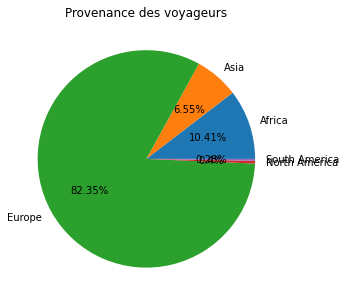

In [13]:
fig = plt.figure(1, figsize=(5, 5))
plt.pie(df_air_traffic_france5['number_planes'], labels=df_air_traffic_france5["continent"], autopct = lambda x: str(round(x, 2)) + '%')
plt.title("Provenance des voyageurs")

Principalement du tourisme intra européen et d'Afrique du Nord, de France vers la France en très grande majorité.

## 1.2. Données sur les arrivées dans l'hôtellerie en France

In [19]:
df_France_Official_Data = pd.read_csv('France_Official_Data.csv')
df_France_Official_Data

,date,variable,department,individus,value_in_thousands
0,2011-01,Arrivées dans l'hôtellerie,Ain,Non-résidents,7.41
1,2011-02,Arrivées dans l'hôtellerie,Ain,Non-résidents,9.54
2,2011-03,Arrivées dans l'hôtellerie,Ain,Non-résidents,12.55
3,2011-04,Arrivées dans l'hôtellerie,Ain,Non-résidents,13.03
4,2011-05,Arrivées dans l'hôtellerie,Ain,Non-résidents,12.97
...,...,...,...,...,...
24955,2021-06,Arrivées dans l'hôtellerie,Yvelines,Résidents,65.91
24956,2021-07,Arrivées dans l'hôtellerie,Yvelines,Résidents,71.18
24957,2021-08,Arrivées dans l'hôtellerie,Yvelines,Résidents,56.66
24958,2021-09,Arrivées dans l'hôtellerie,Yvelines,Résidents,73.9


In [62]:
#df_France_Official_Data.dtypes

In [43]:
len(df_France_Official_Data[df_France_Official_Data["value_in_thousands"]=="(O)"]) #nb de valeurs avec (O)

2304

In [158]:
df_France_Official_Data["value_in_thousands"] = df_France_Official_Data["value_in_thousands"].replace("(O)", np.nan) #remplacer les (O) par des NA
df_France_Official_Data["value_in_thousands"] = df_France_Official_Data["value_in_thousands"].apply(pd.to_numeric) #convertir la variable

### Arrivées dans l'hôtellerie en France : répartition résidents / non-résidents :

Text(0.5, 1.0, "Répartition des arrivées dans l'hôtellerie en France entre ceux qui résident en France et ceux qui n'y résident pas, entre janvier 2011 et octobre 2021")

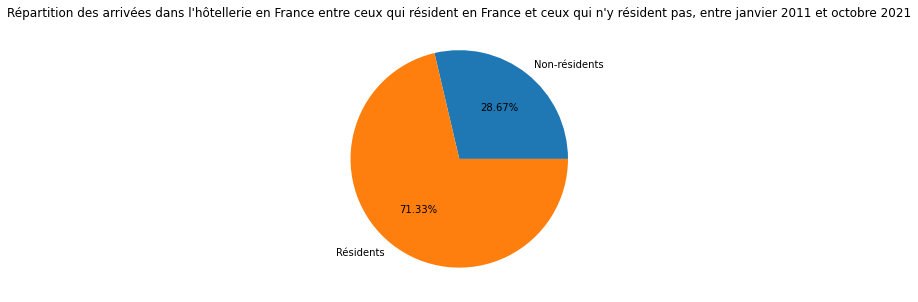

In [61]:
df_nb_arrivees_hotel = df_France_Official_Data.groupby('individus').sum()
df_nb_arrivees_hotel.reset_index(inplace=True)

fig = plt.figure(1, figsize=(5, 5))
plt.pie(df_nb_arrivees_hotel['value_in_thousands'], labels=df_nb_arrivees_hotel["individus"], autopct = lambda x: str(round(x, 2)) + '%')
plt.title("Répartition des arrivées dans l'hôtellerie en France entre ceux qui résident en France et ceux qui n'y résident pas, entre janvier 2011 et octobre 2021")

### Par départements et régions :

In [70]:
#Base avec les régions :
base_regions_dep = pd.read_csv('departements-region.csv')
base_regions_dep.rename(columns={'dep_name': 'department'}, inplace=True)
base_regions_dep

,num_dep,dep_name,region_name
0,01,Ain,Auvergne-Rhône-Alpes
1,02,Aisne,Hauts-de-France
2,03,Allier,Auvergne-Rhône-Alpes
3,04,Alpes-de-Haute-Provence,Provence-Alpes-Côte d'Azur
4,05,Hautes-Alpes,Provence-Alpes-Côte d'Azur
...,...,...,...
96,971,Guadeloupe,Guadeloupe
97,972,Martinique,Martinique
98,973,Guyane,Guyane
99,974,La Réunion,La Réunion


In [83]:
df_France_Official_Data2 = df_France_Official_Data.merge(base_regions_dep, on='department', how='left')

In [84]:
df_arrivees_hotel_dep = df_France_Official_Data2.groupby('department').sum()
df_arrivees_hotel_dep.reset_index(inplace=True)

Text(0, 0.5, 'Département')

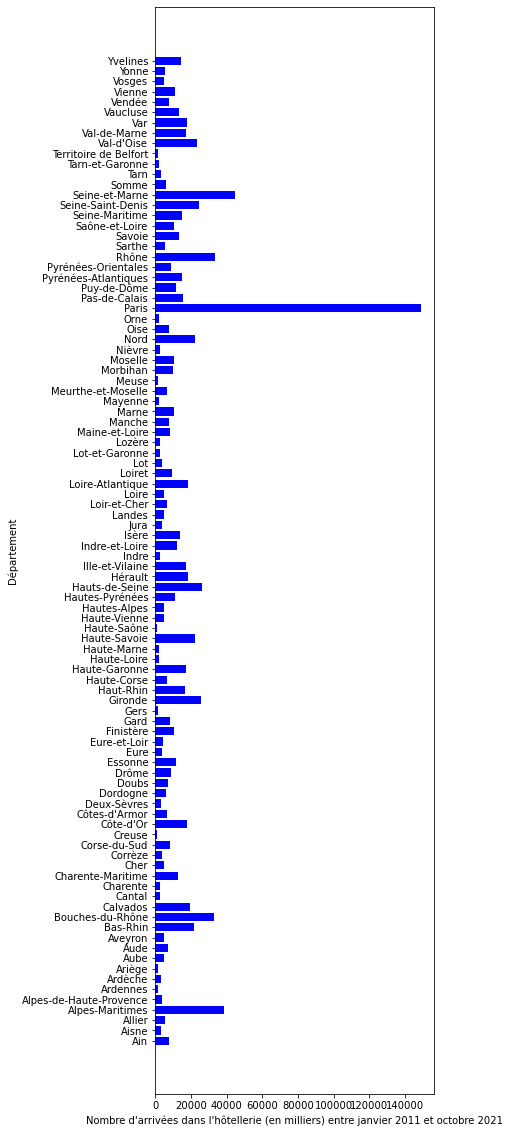

In [77]:
fig = plt.figure(1, figsize=(5, 20))
plt.barh(df_arrivees_hotel_dep["department"], df_arrivees_hotel_dep['value_in_thousands'], color="blue")
plt.xlabel("Nombre d'arrivées dans l'hôtellerie (en milliers) entre janvier 2011 et octobre 2021")
plt.ylabel('Département')

In [180]:
df_arrivees_hotel_regions = df_France_Official_Data2.groupby('region_name').sum().sort_values('value_in_thousands', ascending = False)
df_arrivees_hotel_regions.reset_index(inplace=True)

Text(0, 0.5, 'Région')

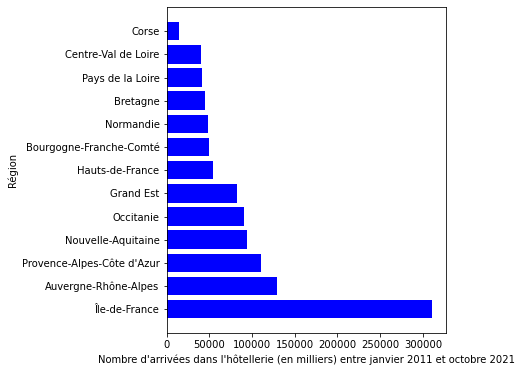

In [181]:
fig = plt.figure(1, figsize=(5, 6))
plt.barh(df_arrivees_hotel_regions["region_name"], df_arrivees_hotel_regions['value_in_thousands'], color="blue")
plt.xlabel("Nombre d'arrivées dans l'hôtellerie (en milliers) entre janvier 2011 et octobre 2021")
plt.ylabel('Région')

In [184]:
df_arrivees_hotel_regions2 = df_France_Official_Data2.groupby(['region_name','individus']).sum()
df_arrivees_hotel_regions2.reset_index(inplace=True)

Text(0.5, 1.0, "Nombre d'arrivées dans l'hôtellerie (en milliers) entre janvier 2011 et octobre 2021")

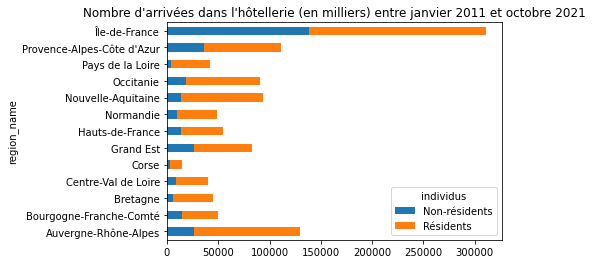

In [185]:
df_arrivees_hotel_regions2.groupby(['region_name','individus']).sum().unstack().plot(kind='barh',y='value_in_thousands', stacked=True)
plt.title("Nombre d'arrivées dans l'hôtellerie (en milliers) entre janvier 2011 et octobre 2021")

### Evolution dans le temps du nombre d'arrivées dans l'hôtellerie :

In [108]:
df_arrivees_hotel_temps = df_France_Official_Data.groupby('date').sum()
df_arrivees_hotel_temps.reset_index(inplace=True)

Text(0, 0.5, "Nombre d'arrivées dans l'hôtellerie")

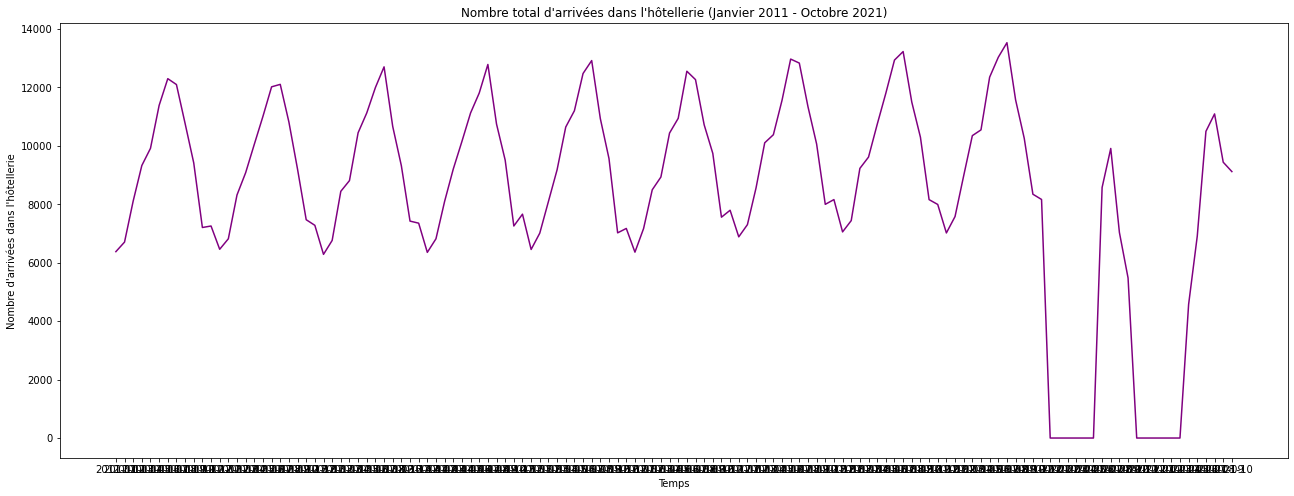

In [142]:
x = df_arrivees_hotel_temps["date"]
y = df_arrivees_hotel_temps["value_in_thousands"]
fig = plt.figure(1, figsize=(22, 8))
plt.plot(x, y, color="purple")

plt.title("Nombre total d'arrivées dans l'hôtellerie (Janvier 2011 - Octobre 2021)")
plt.xlabel('Temps')
plt.ylabel("Nombre d'arrivées dans l'hôtellerie")

In [135]:
df_arrivees_hotel_pivot = df_France_Official_Data.reset_index().pivot_table(columns="individus", values="value_in_thousands", index=["date", "department"])
df_arrivees_hotel_pivot.reset_index(inplace=True)

df_arrivees_hotel_temps_bis = df_arrivees_hotel_pivot.groupby('date').sum()
df_arrivees_hotel_temps_bis.reset_index(inplace=True)

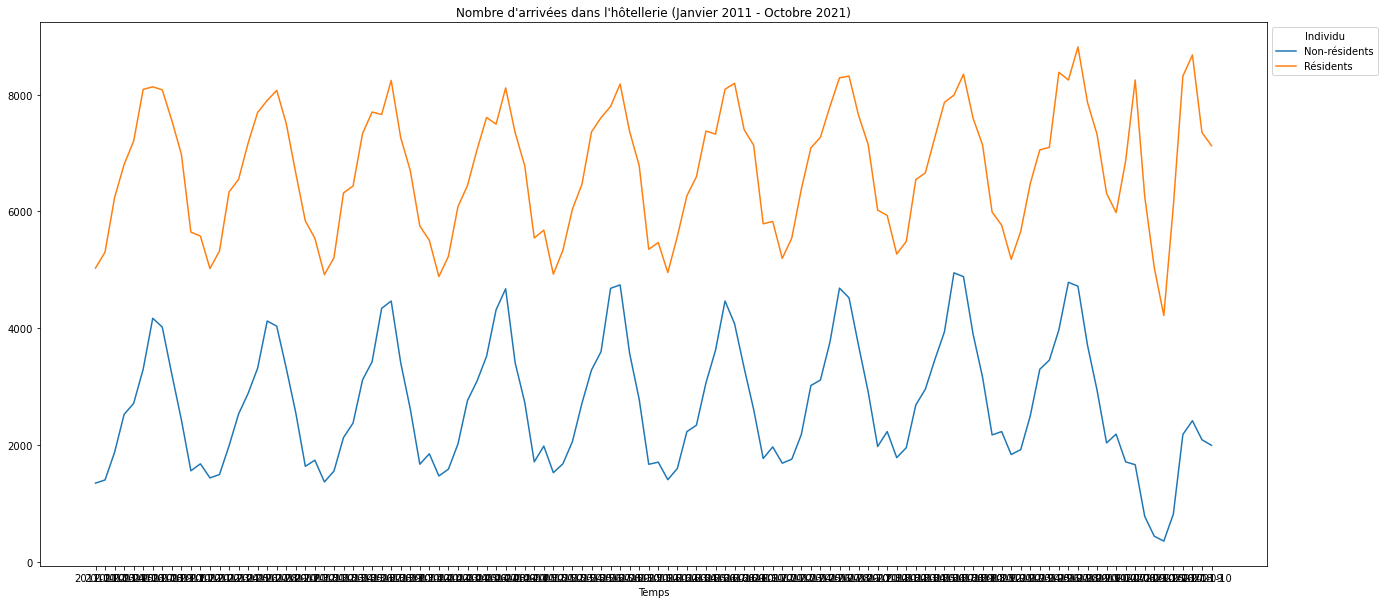

In [140]:
x = df_arrivees_hotel_temps_bis["date"]
y = df_arrivees_hotel_temps_bis["Non-résidents"]
z = df_arrivees_hotel_temps_bis["Résidents"]

fig = plt.figure(1, figsize=(22, 10))
plt.plot(x, y, label="Non-résidents")
plt.plot(x, z, label="Résidents")

plt.legend(title="Individu", loc = 2, bbox_to_anchor = (1,1))
plt.title("Nombre d'arrivées dans l'hôtellerie (Janvier 2011 - Octobre 2021)")
plt.xlabel('Temps')

plt.show()

## 1.3. Données sur les commentaires des individus ayant passé une nuit à l'hôtel

In [12]:
df_reviews_us_france_210712 = pd.read_csv('reviews_us_france_210712.csv')
df_reviews_france=df_reviews_us_france_210712[df_reviews_us_france_210712['country']=="France"]
df_reviews_france

,country,city,reviewerLocation,publication_date,stay_date,number_of_reviewers
77,France,Paris,France,2021-11-14,2021-11,87
163,France,Paris,France,2021-11-22,2021-11,69
179,France,Paris,France,2021-11-29,2021-11,67
189,France,Paris,France,2021-11-28,2021-11,65
232,France,Paris,France,2021-11-15,2021-11,59
...,...,...,...,...,...,...
119223,France,Paris,Turkey,2018-08-07,2018-07,1
119224,France,Nice,Poland,2021-07-19,2021-06,1
119225,France,Paris,Turkey,2018-08-05,2018-08,1
119226,France,Strasbourg,Botswana,2021-07-14,2021-07,1


### D'où viennent les principaux reviewer qui ont laissé des commentaires sur les hôtels de France ?

In [161]:
df_reviews_france_location = df_reviews_france.groupby("reviewerLocation").sum()
df_reviews_france_location.reset_index(inplace=True)

In [164]:
#le top 20 des pays d'où sont issus les individus qui laissent le plus de commentaires
df_reviews_france_location_top20 = df_reviews_france_location.sort_values('number_of_reviewers', ascending = False).head(20)

Text(0.5, 1.0, "Top 20 des pays d'où sont originaires les individus qui laissent le plus de commentaires sur les hôtels de France")

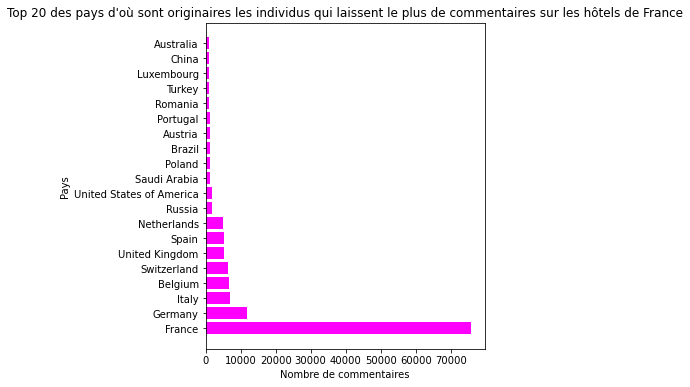

In [166]:
fig = plt.figure(1, figsize=(5, 6))
plt.barh(df_reviews_france_location_top20["reviewerLocation"], df_reviews_france_location_top20['number_of_reviewers'], color="magenta")
plt.xlabel("Nombre de commentaires")
plt.ylabel('Pays')
plt.title("Top 20 des pays d'où sont originaires les individus qui laissent le plus de commentaires sur les hôtels de France")

### Quelles sont les villes dont les hôtels ont reçu le plus de commentaires ?

In [178]:
df_reviews_france_city = df_reviews_france.groupby("city").sum().sort_values('number_of_reviewers', ascending = False)
df_reviews_france_city.reset_index(inplace=True)
df_reviews_france_city

,city,number_of_reviewers
0,Paris,50733
1,Lyon,29516
2,Marseille,27056
3,Strasbourg,20509
4,Paris - Disney,13714
5,Nice,10694
6,Ski resorts,3391


Text(0.5, 1.0, 'Les villes françaises dont les hôtels ont reçu le plus de commentaires')

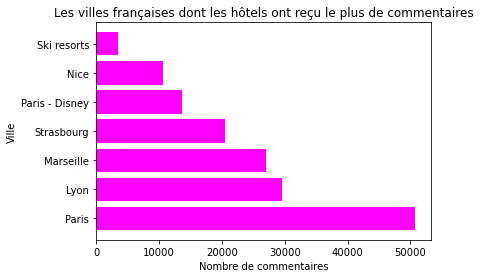

In [179]:
fig = plt.figure(1, figsize=(6, 4))
plt.barh(df_reviews_france_city["city"], df_reviews_france_city['number_of_reviewers'], color="magenta")
plt.xlabel("Nombre de commentaires")
plt.ylabel('Ville')
plt.title("Les villes françaises dont les hôtels ont reçu le plus de commentaires")

### Evolution du nombre de commentaires au cours du temps

In [187]:
df_reviews_france_temps = df_reviews_france.groupby("stay_date").sum()
df_reviews_france_temps.reset_index(inplace=True)

Text(0, 0.5, 'Nombre de commentaires')

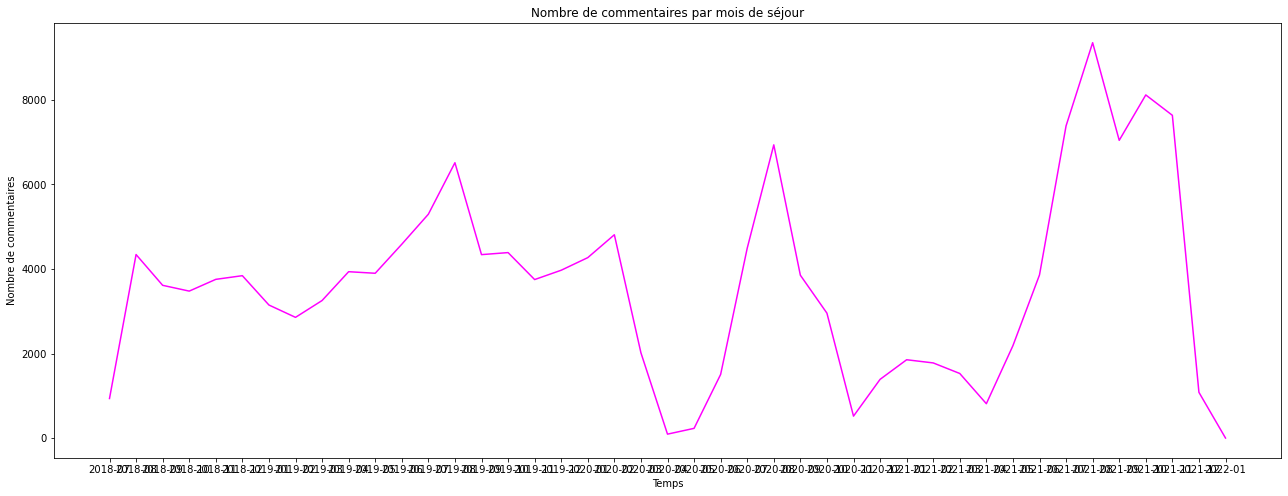

In [189]:
x = df_reviews_france_temps["stay_date"]
y = df_reviews_france_temps["number_of_reviewers"]
fig = plt.figure(1, figsize=(22, 8))
plt.plot(x, y, color="magenta")

plt.title("Nombre de commentaires par mois de séjour")
plt.xlabel('Temps')
plt.ylabel("Nombre de commentaires")

###### Pour comparer : Evolution du nombre de commentaires au cours du temps (en groupby publication_date)

In [191]:
df_reviews_france_temps2 = df_reviews_france.groupby("publication_date").sum()
df_reviews_france_temps2.reset_index(inplace=True)

Text(0, 0.5, 'Nombre de commentaires')

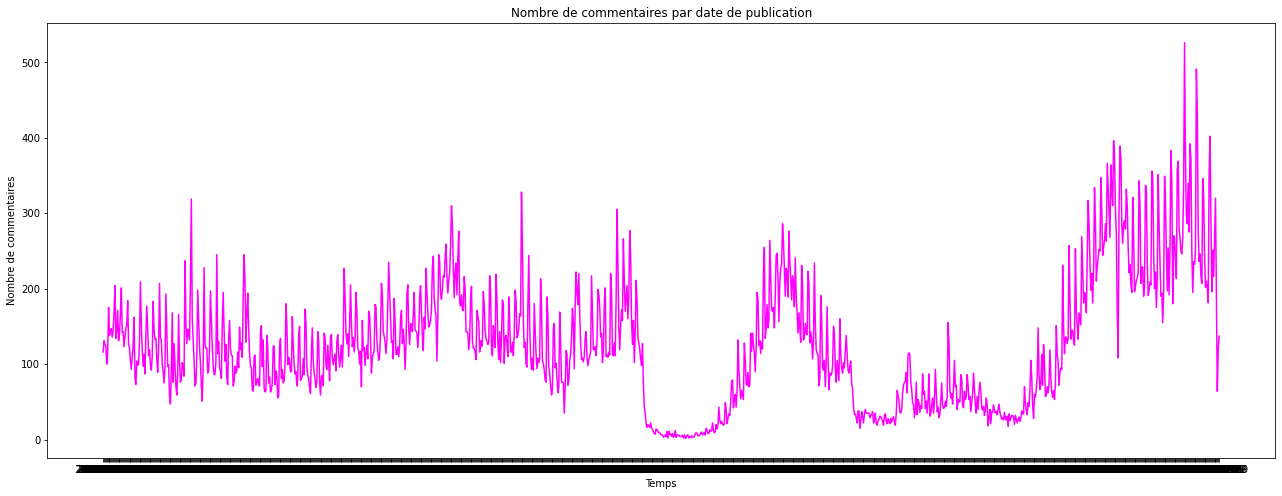

In [192]:
x = df_reviews_france_temps2["publication_date"]
y = df_reviews_france_temps2["number_of_reviewers"]
fig = plt.figure(1, figsize=(22, 8))
plt.plot(x, y, color="magenta")

plt.title("Nombre de commentaires par date de publication")
plt.xlabel('Temps')
plt.ylabel("Nombre de commentaires")

On retrouve la même tendance que précédemment.

# 2. Données USA

## 2.1. Données trafic aérien

In [146]:
df_air_traffic_US = pd.read_csv('us_air_traffic_210712.csv')
df_air_traffic_US

,sheduled_time_start,country_origin,city_dest_,seats,number_planes
0,2017-05-15,United States-HI,Phoenix-AZ,234.0,1
1,2017-05-15,United States-HI,Seattle-WA,215.0,1
2,2017-05-16,Argentina,Atlanta-GA,375.0,1
3,2017-05-16,Argentina,Miami-FL,643.0,2
4,2017-05-16,Argentina,New York-NY,293.0,1
...,...,...,...,...,...
4033878,2021-12-07,United States-WY,United States-MT,234.0,1
4033879,2021-12-07,United States-WY,United States-WY,21.0,1
4033880,2021-12-07,"Virgin Islands, Us",Atlanta-GA,234.0,1
4033881,2021-12-07,"Virgin Islands, Us",Miami-FL,323.0,2


### Destination des vols

In [147]:
df_air_traffic_US2 = df_air_traffic_US.groupby('city_dest_').sum()
df_air_traffic_US2 = df_air_traffic_US2.reset_index()

In [148]:
# Total de sièges et de vols vers les USA
df_air_traffic_US3=df_air_traffic_US2.sum()
df_air_traffic_US3

city_dest_       Akron-OHAlbany-NYAlbuquerque-NMAllentown-PAAnn...
seats                                                 3037246673.0
number_planes                                             19680742
dtype: object

Text(0, 0.5, 'Destination')

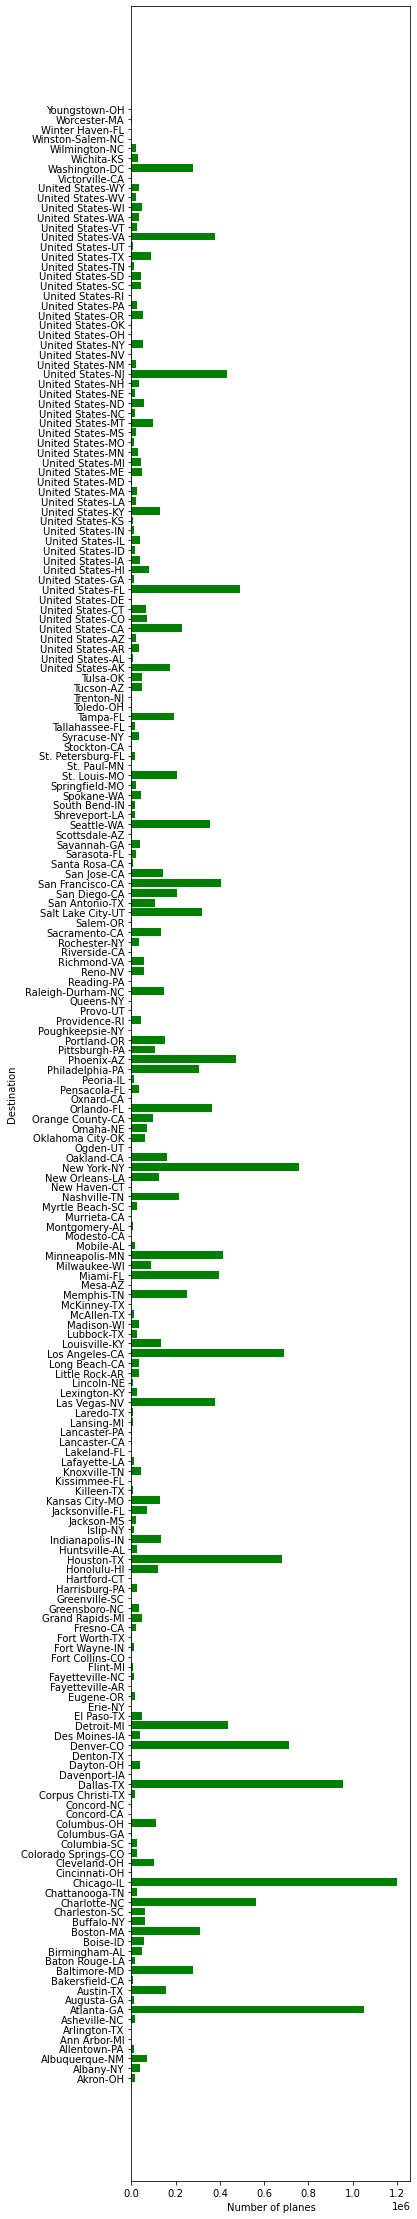

In [149]:
# On visualise le nombre de vols qui arrivent dans les différents aéroports américains.
fig = plt.figure(1, figsize=(5, 40))
plt.barh( df_air_traffic_US2["city_dest_"], df_air_traffic_US2['number_planes'], color="green")
plt.xlabel('Number of planes')
plt.ylabel('Destination')

On regarde les principales destinations

In [150]:
TOP20_DEST = df_air_traffic_US2.groupby('city_dest_').agg({'number_planes': "sum"}).sort_values('number_planes', ascending = False).head(20)
TOP20_DEST

,number_planes
city_dest_,
Chicago-IL,1201024
Atlanta-GA,1051515
Dallas-TX,955892
New York-NY,759052
Denver-CO,713621
Los Angeles-CA,690123
Houston-TX,680757
Charlotte-NC,562036
United States-FL,488720


### Origine des vols

In [153]:
# On fait la somme du nombre de sièges et de vols par pays d'origine 
df_air_traffic_US_origin = df_air_traffic_US.groupby('country_origin').sum()
df_air_traffic_US_origin = df_air_traffic_US_origin.reset_index()

In [154]:
# Total de sièges et de vols
df_air_traffic_US_origin1 = df_air_traffic_US_origin.sum()
df_air_traffic_US_origin1

country_origin    Antigua And BarbudaArgentinaArubaAustraliaAust...
seats                                                  3037246673.0
number_planes                                              19680742
dtype: object

On regarde les principaux pays d'origine.

In [155]:
TOP20_Origin = df_air_traffic_US_origin.groupby('country_origin').agg({'number_planes': "sum"}).sort_values('number_planes', ascending = False).head(40)
TOP20_Origin

,number_planes
country_origin,
United States-TX,1899115
United States-CA,1882241
United States-FL,1282962
United States-IL,1119448
United States-GA,969306
United States-CO,800537
United States-NY,796753
United States-NC,786546
United States-AZ,520921


### Pays d'origine des vols, hors vols interne (hors vols originaires des USA)

In [156]:
df_air_traffic_USpas = df_air_traffic_US[~df_air_traffic_US['country_origin'].str.startswith('United States')]
df_air_traffic_USpas

,sheduled_time_start,country_origin,city_dest_,seats,number_planes
2,2017-05-16,Argentina,Atlanta-GA,375.0,1
3,2017-05-16,Argentina,Miami-FL,643.0,2
4,2017-05-16,Argentina,New York-NY,293.0,1
5,2017-05-16,Australia,Honolulu-HI,293.0,1
6,2017-05-16,Bahamas,Miami-FL,88.0,1
...,...,...,...,...,...
4032779,2021-12-07,United Kingdom,Seattle-WA,400.0,1
4032780,2021-12-07,United Kingdom,Washington-DC,420.0,1
4033880,2021-12-07,"Virgin Islands, Us",Atlanta-GA,234.0,1
4033881,2021-12-07,"Virgin Islands, Us",Miami-FL,323.0,2


In [157]:
TOP20_Origin_notUS = df_air_traffic_USpas.groupby('country_origin').agg({'number_planes': "sum"}).sort_values('number_planes', ascending = False).head(40)
TOP20_Origin_notUS

,number_planes
country_origin,
Mexico,246077
Canada,238036
United Kingdom,120294
Japan,82808
Germany,72530
Puerto Rico,61488
China,59100
Dominican Republic,47497
France,47348


## 2.2. Données sur les arrivées aux USA

In [4]:
df_US_ODI = pd.read_csv('United_States_Official_Data_International.csv')
df_US_ODI

,date,individus,value,variable,department
0,2020-01,Total International,5795646,arrivals,United States
1,2020-02,Total International,4991503,arrivals,United States
2,2020-03,Total International,3137009,arrivals,United States
3,2020-04,Total International,248952,arrivals,United States
4,2020-05,Total International,272296,arrivals,United States
...,...,...,...,...,...
8065,2021-06,Thailand,2032,arrivals,United States
8066,2021-07,Thailand,2834,arrivals,United States
8067,2021-08,Thailand,4273,arrivals,United States
8068,2021-09,Thailand,2210,arrivals,United States


In [5]:
df_US_ODI['individus'].unique()

array(['Total International', 'Mexico', 'Canada', 'Western Europe',
       'Asia', 'South America', 'Caribbean', 'Central America',
       'Middle East', 'Oceania', 'Eastern Europe', 'Africa',
       'United Kingdom', 'Japan', 'South Korea', 'Brazil',
       'China, PRC (excluding Hong Kong)', 'India', 'France', 'Germany',
       'Colombia', 'Australia', 'Argentina', 'Dominican Republic',
       'Ecuador', 'Spain', 'Italy', 'Chile', 'Netherlands', 'Costa Rica',
       'Peru', 'Taiwan', 'Venezuela', 'Israel', 'Jamaica', 'Ireland',
       'Guatemala', 'Sweden', 'Honduras', 'Bahamas', 'Switzerland',
       'El Salvador', 'Russia', 'Panama', 'Poland', 'Haiti', 'Denmark',
       'Turkey', 'Philippines', 'Belgium', 'New Zealand', 'Norway',
       'Austria', 'Saudi Arabia', 'Finland', 'Cuba', 'Ukraine',
       'Pakistan', 'Singapore', 'South Africa', 'Nigeria', 'Portugal',
       'Top 50 Overseas Countries', 'China, PRC', 'Bolivia',
       'United Arab Emirates', 'Nicaragua', 'Paraguay', 'Guy

In [6]:
df_US_Continent=df_US_ODI[df_US_ODI["individus"].isin(
    ['Asia', 'Western Europe', 'Eastern Europe', 'Middle East', 'South America', 'Caribbean', 'Central America',
    'Oceania', 'Eastern Europe', 'Africa'])]
df_US_Continent

,date,individus,value,variable,department
36,2020-01,Western Europe,784718,arrivals,United States
37,2020-02,Western Europe,958806,arrivals,United States
38,2020-03,Western Europe,325859,arrivals,United States
39,2020-04,Western Europe,4901,arrivals,United States
40,2020-05,Western Europe,3883,arrivals,United States
...,...,...,...,...,...
7555,2021-06,Oceania,3442,arrivals,United States
7556,2021-07,Oceania,4023,arrivals,United States
7557,2021-08,Oceania,5421,arrivals,United States
7558,2021-09,Oceania,3643,arrivals,United States


Text(0.5, 0, 'Zone géographique')

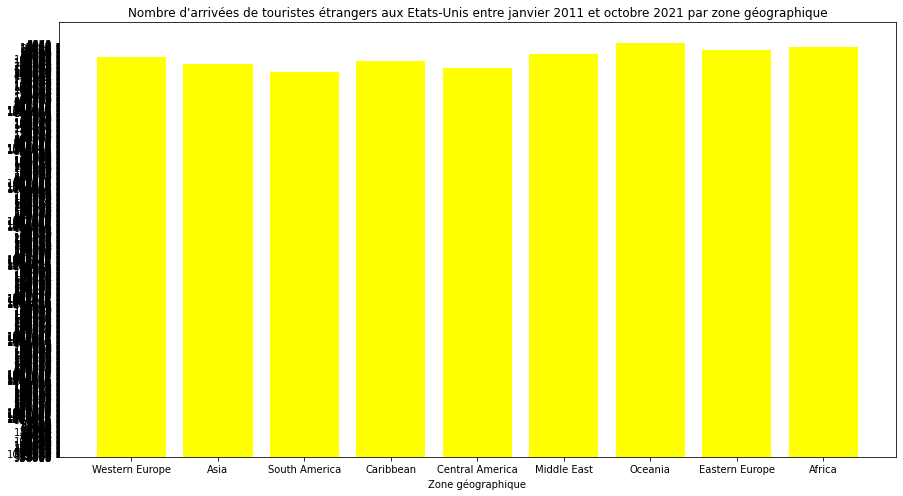

In [7]:
fig = plt.figure(1, figsize=(15, 8))
plt.bar(df_US_Continent["individus"], df_US_Continent['value'], color="yellow")
plt.title("Nombre d'arrivées de touristes étrangers aux Etats-Unis entre janvier 2011 et octobre 2021 par zone géographique")
plt.xlabel('Zone géographique')

In [8]:
df_US_Continent['value']=df_US_Continent['value'].astype(int)
df_US_Continent

<ipython-input-8-fb02c8041d56>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_US_Continent['value']=df_US_Continent['value'].astype(int)


,date,individus,value,variable,department
36,2020-01,Western Europe,784718,arrivals,United States
37,2020-02,Western Europe,958806,arrivals,United States
38,2020-03,Western Europe,325859,arrivals,United States
39,2020-04,Western Europe,4901,arrivals,United States
40,2020-05,Western Europe,3883,arrivals,United States
...,...,...,...,...,...
7555,2021-06,Oceania,3442,arrivals,United States
7556,2021-07,Oceania,4023,arrivals,United States
7557,2021-08,Oceania,5421,arrivals,United States
7558,2021-09,Oceania,3643,arrivals,United States


In [9]:
df_US_date=df_US_Continent.groupby('date', as_index=False).sum()
df_US_date

,date,value
0,2011-01,1893399
1,2011-02,1708976
2,2011-03,1957736
3,2011-04,2412421
4,2011-05,2330641
...,...,...
125,2021-06,786200
126,2021-07,864239
127,2021-08,963344
128,2021-09,714997


Text(0, 0.5, "Nombre d'arrivées")

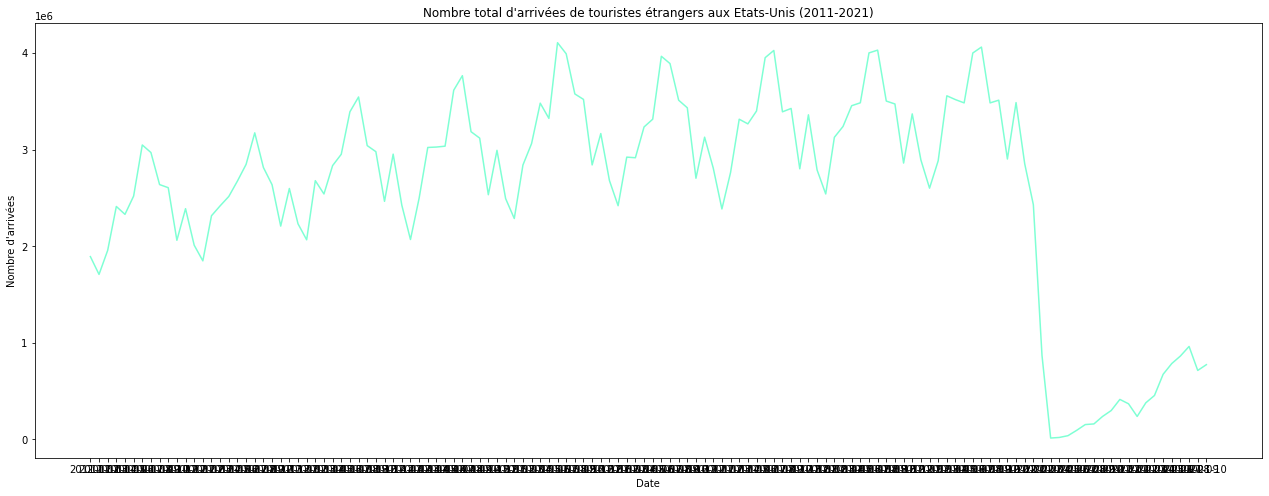

In [10]:
x = df_US_date["date"]
y = df_US_date["value"]
fig = plt.figure(1, figsize=(22, 8))
plt.plot(x, y, color="aquamarine")
plt.title("Nombre total d'arrivées de touristes étrangers aux Etats-Unis (2011-2021)")
plt.xlabel('Date')
plt.ylabel("Nombre d'arrivées")

## 2.3. Données sur les commentaires des individus ayant passé une nuit à l'hôtel

In [13]:
df_reviews_usa=df_reviews_us_france_210712[df_reviews_us_france_210712['country']=="United States"]
df_reviews_usa

,country,city,reviewerLocation,publication_date,stay_date,number_of_reviewers
0,United States,Las Vegas,United States of America,2021-11-29,2021-11,164
1,United States,Las Vegas,United States of America,2021-04-12,2021-04,140
2,United States,Las Vegas,United States of America,2021-06-28,2021-06,136
3,United States,Las Vegas,United States of America,2021-04-26,2021-04,134
4,United States,Las Vegas,United States of America,2021-07-06,2021-07,130
...,...,...,...,...,...,...
221188,United States,Chicago,Croatia,2018-09-13,2018-09,1
221189,United States,Chicago,Croatia,2018-09-18,2018-08,1
221190,United States,Chicago,Croatia,2018-09-23,2018-09,1
221191,United States,Chicago,Croatia,2018-09-30,2018-09,1


Text(0.5, 1.0, "Top 20 des pays d'où sont originaires les individus qui laissent le plus de commentaires sur les hôtels aux Etats-Unis")

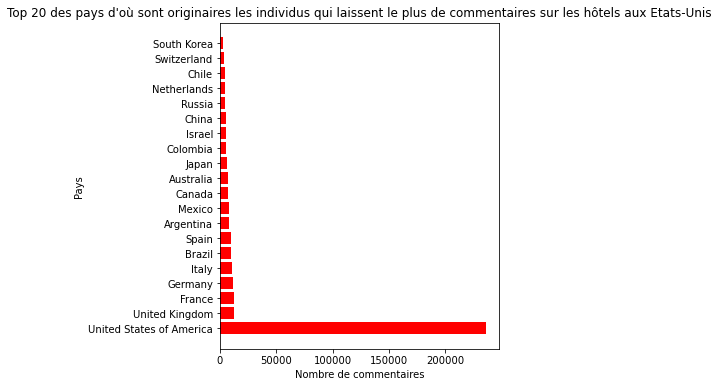

In [14]:
df_reviews_US_location_top20= df_reviews_usa.groupby("reviewerLocation", as_index=False).sum().sort_values('number_of_reviewers', ascending = False).head(20)
fig = plt.figure(1, figsize=(5, 6))
plt.barh(df_reviews_US_location_top20["reviewerLocation"], df_reviews_US_location_top20['number_of_reviewers'], color="red")
plt.xlabel("Nombre de commentaires")
plt.ylabel('Pays')
plt.title("Top 20 des pays d'où sont originaires les individus qui laissent le plus de commentaires sur les hôtels aux Etats-Unis")

Text(0.5, 1.0, 'Les villes américaines dont les hôtels ont reçu le plus de commentaires')

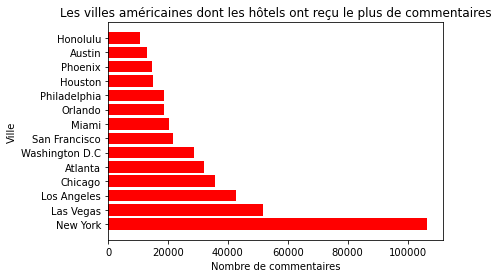

In [15]:
df_reviews_US_city = df_reviews_usa.groupby("city", as_index=False).sum().sort_values('number_of_reviewers', ascending = False)
df_reviews_US_city
fig = plt.figure(1, figsize=(6, 4))
plt.barh(df_reviews_US_city["city"], df_reviews_US_city['number_of_reviewers'], color="red")
plt.xlabel("Nombre de commentaires")
plt.ylabel('Ville')
plt.title("Les villes américaines dont les hôtels ont reçu le plus de commentaires")

Text(0, 0.5, 'Nombre de commentaires')

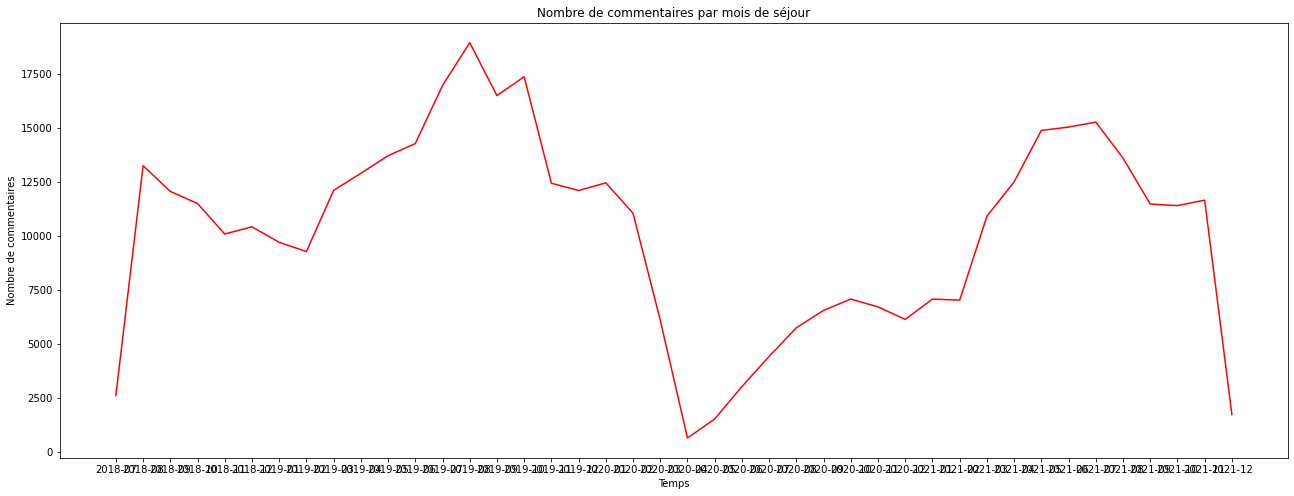

In [16]:
df_reviews_US_temps = df_reviews_usa.groupby("stay_date", as_index=False).sum()
x = df_reviews_US_temps["stay_date"]
y = df_reviews_US_temps["number_of_reviewers"]
fig = plt.figure(1, figsize=(22, 8))
plt.plot(x, y, color="red")

plt.title("Nombre de commentaires par mois de séjour")
plt.xlabel('Temps')
plt.ylabel("Nombre de commentaires")